In [1]:
import yt
ds = yt.load_sample('DeeplyNestedZoom')

yt : [INFO     ] 2024-10-30 11:23:07,920 Sample dataset found in '/Users/chavlin/data/yt_data/DeeplyNestedZoom/DD0025/data0025'
yt : [INFO     ] 2024-10-30 11:23:08,048 Parameters: current_time              = 14.1336338797
yt : [INFO     ] 2024-10-30 11:23:08,048 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-10-30 11:23:08,048 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-30 11:23:08,049 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-10-30 11:23:08,049 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-10-30 11:23:08,049 Parameters: current_redshift          = 14.092558914923
yt : [INFO     ] 2024-10-30 11:23:08,049 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2024-10-30 11:23:08,050 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2024-10-30 11:23:08,050 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-10-30 11:23:08,050 Parameters: hubb

Parsing Hierarchy : 100%|████████████████████████████████████████████████████████| 1825/1825 [00:00<00:00, 18676.97it/s]
yt : [INFO     ] 2024-10-30 11:23:10,233 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2024-10-30 11:23:10,679 xlim = 0.448882 0.551118
yt : [INFO     ] 2024-10-30 11:23:10,679 ylim = 0.448882 0.551118
yt : [INFO     ] 2024-10-30 11:23:10,680 xlim = 0.448882 0.551118
yt : [INFO     ] 2024-10-30 11:23:10,681 ylim = 0.448882 0.551118
yt : [INFO     ] 2024-10-30 11:23:10,685 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



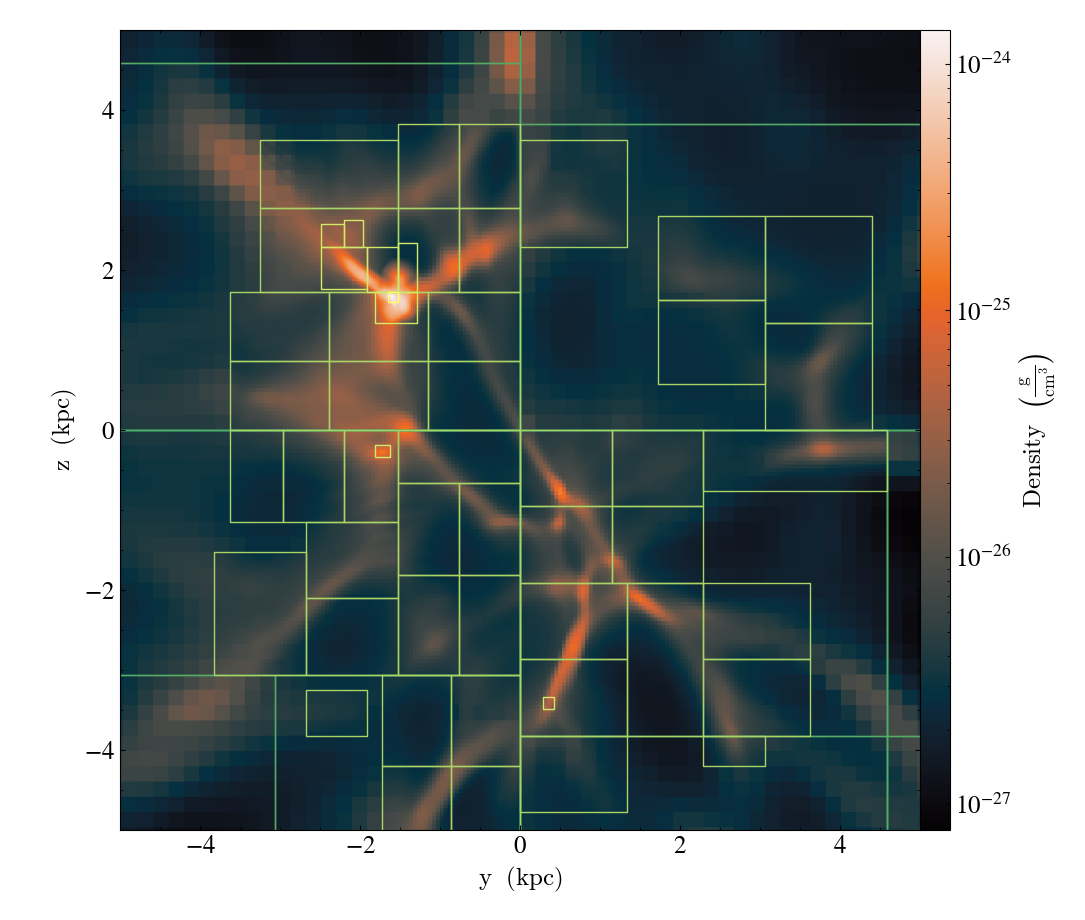

In [2]:
slc = yt.SlicePlot(ds,  # dataset
                   'x',  # normal-axis
                   ('gas', 'density'),  # field to plot
                   width=(10,'kpc'),  # width of plot (in physical units)
                  )
slc.annotate_grids(alpha=1, cmap='summer')
slc.set_cmap(('gas', 'density'), 'dusk')
slc.show()

In [3]:
ds.filename  # main metadata file

'/Users/chavlin/data/yt_data/DeeplyNestedZoom/DD0025/data0025'

In [20]:
from pathlib import Path
import os
os.listdir(Path(ds.filename).parent)[:10]

['data0025.cpu0448',
 'data0025.cpu0221',
 'data0025.cpu0013',
 'data0025.cpu0477',
 'data0025.cpu0219',
 'data0025.cpu0470',
 'data0025.cpu0014',
 'data0025.cpu0226',
 'data0025.cpu0479',
 'data0025.cpu0022']

In [7]:
grid = ds.index.grids[1200]
print(f"{grid} \nAMR level: {grid.Level}")
print(f"Bounds:\n    left edge:  {grid.LeftEdge}")
print(f"    right edge: {grid.RightEdge}")
print(f"Parent grid: {grid.Parent}")

EnzoGrid_1201 ([26 24  8]) 
AMR level: 9
Bounds:
    left edge:  [0.49133301 0.50509644 0.49035645] code_length
    right edge: [0.49172974 0.50546265 0.49047852] code_length
Parent grid: EnzoGrid_1200 ([32 34 10])


In [8]:
ds.max_level

40

## operations

when you do operations... 

In [9]:
# find location of a maximum of a field
ad = ds.all_data()
max_info = ad.quantities.max_location(('gas', 'density'))
max_val = max_info[0]
max_loc = ds.arr(max_info[1:])
max_val, max_loc

(unyt_quantity(0.00587829, 'g/cm**3'),
 unyt_array([0.49150733, 0.50526053, 0.49058056], 'code_length'))

chunks handled sequentially (or in parallel if using MPI)

## spatial selections

In [10]:
# spherical selection centered at that maximum
sp = ds.sphere(max_loc, (1., 'kpc'))
sp 

YTSphere (data0025): , center=[1.48344848e+23 1.52495788e+23 1.48065135e+23] cm, radius=3.085677580962325e+21 cm

In [11]:
# extract data from spatial selection
data = sp['gas','temperature']
data, data.shape

(unyt_array([8961.14316287, 8919.66139664, 8766.58074351, ...,
               10.77946123,   12.94106397,   11.70121456], 'K'),
 (2253509,))

selection is hierarchical! 

given `sphere`, `ds.index` hierarchy traversed, non-intersecting grids (and subgrids) are not loaded. 

yt : [INFO     ] 2024-10-30 11:36:10,032 xlim = 0.495037 0.515484
yt : [INFO     ] 2024-10-30 11:36:10,032 ylim = 0.480357 0.500804
yt : [INFO     ] 2024-10-30 11:36:10,033 xlim = 0.495037 0.515484
yt : [INFO     ] 2024-10-30 11:36:10,034 ylim = 0.480357 0.500804
yt : [INFO     ] 2024-10-30 11:36:10,034 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



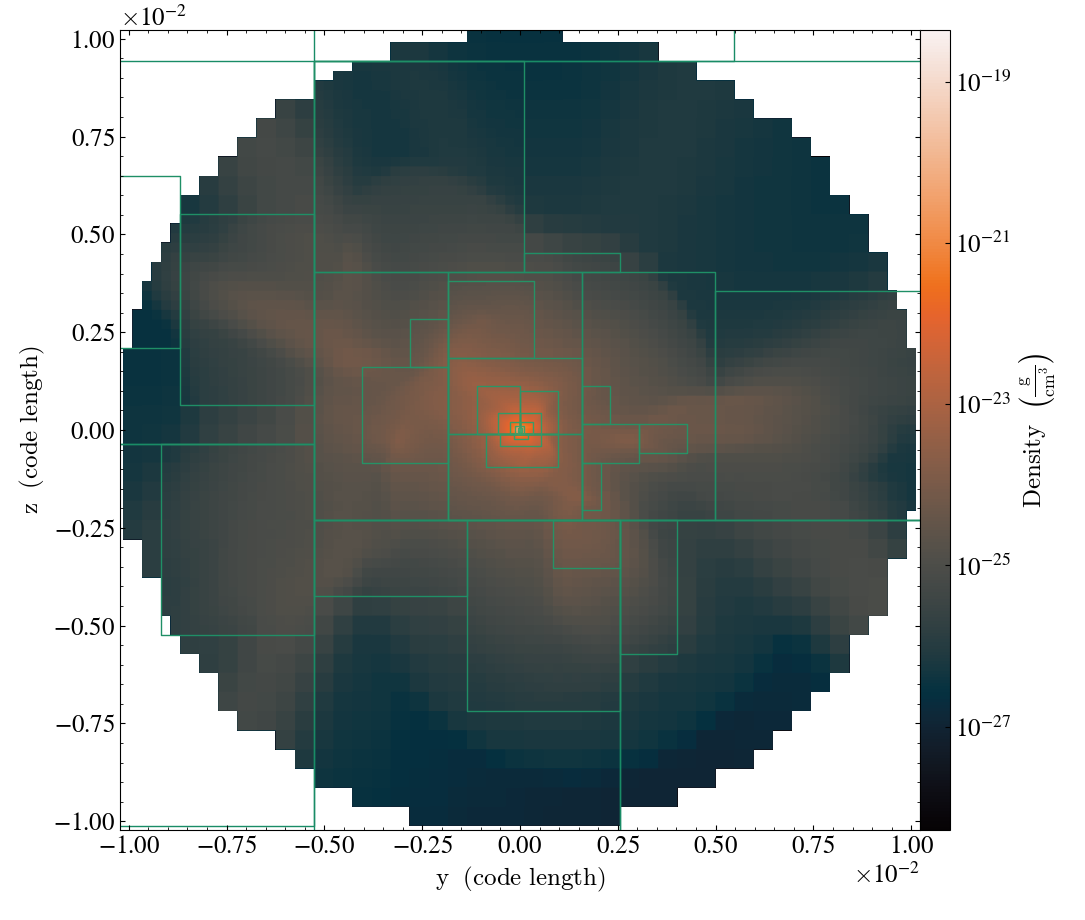

In [21]:
# use the spatial selection in almost any function
slc = yt.SlicePlot(ds,                 # dataset
                   'x',                # normal-axis
                   ('gas', 'density'), # field to plot
                   width=sp.radius * 2,
                   center = sp.center,
                   data_source = sp,
                  )
slc.annotate_grids(alpha=1, cmap='summer')
slc.set_cmap(('gas', 'density'), 'dusk')
slc.show()

statistics of the selections

* "ProfilePlot" -- 1D binned statistic 
* "PhasePlot" -- 2D binned statistic 

e.g., for a 2d histogram, an unweighted sum of cell count:


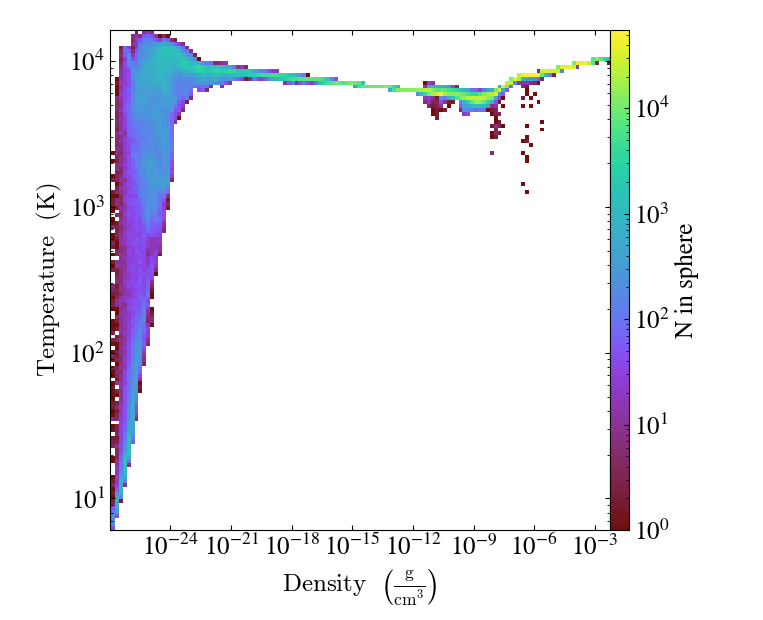

In [13]:
pp = yt.PhasePlot(sp, 
                 ('gas', 'density'),
                 ('gas', 'temperature'), 
                 ('index', 'ones'),
                 weight_field=None,
                 figure_size=(5,5)) 
pp.set_colorbar_label(('index', 'ones'),'N in sphere')

## derived calculations

could do...

In [15]:
import numpy as np 

np.sum(sp['gas', 'density'] * sp['gas', 'temperature'])

unyt_quantity(1012194.74381006, 'K*g/cm**3')

or define a new field, calculated on demand (by chunk/index object)!
https://yt-project.org/doc/developing/creating_derived_fields.html

In [16]:
def _dentemp(field, data):
    return (
          data["gas", "density"]
        * data["gas", "temperature"]
    )

In [17]:
ds.add_field(
    name=("gas", "dentemp"),
    function=_dentemp,
    sampling_type="local",
)

read then sum, a little less memory use:

In [18]:
sp['gas', 'dentemp'].sum()

yt : [WARNING  ] 2024-10-30 11:33:00,661 Field ('gas', 'dentemp') was added without specifying units or dimensions, auto setting units to 'K*g/cm**3'


unyt_quantity(1012194.74381006, 'K*g/cm**3')

or use the quantities calculations for an MPI-compatible reduction across chunks

In [19]:
sp.quantities.total_quantity(('gas', 'dentemp'))

unyt_quantity(1012194.74381006, 'K*g/cm**3')